<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [18]:
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
import numpy as np


(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
np.random.seed(42)

MinMax = MinMaxScaler()
X = MinMax.fit_transform(train_data)
X_test = MinMax.fit_transform(test_data)

y = train_targets
y_test = test_targets

model = Sequential(name='Boston_Housing_1st_Attempt')
model.add(Dense(50, input_dim=13, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

history = model.fit(X,y, epochs=50, verbose=False, validation_split=0, validation_data=(X_test, y_test))
model.evaluate(X,y)
history.history.keys()

Model: "Boston_Housing_1st_Attempt"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 5,851
Trainable params: 5,851
Non-trainable params: 0
_________________________________________________________________
13/13 [==============================] - 0s 528us/step - loss: 14.1112


dict_keys(['loss', 'val_loss'])

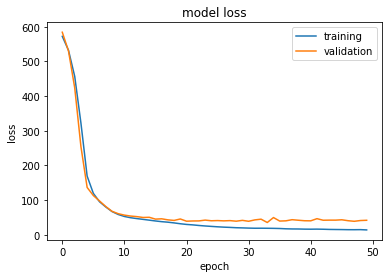

In [2]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model2 = LinearRegression()
model2.fit(X, y)
print('training data linear regression:', mean_squared_error(model2.predict(X), y))
print('training data neural network:', mean_squared_error(model.predict(X), y))
print()
print('test data linear regression:', mean_squared_error(model2.predict(X_test), y_test))
print('test data neural network:', mean_squared_error(model.predict(X_test), y_test))

training data linear regression: 22.00480083834814
training data neural network: 13.747343442344725

test data linear regression: 40.60145446671504
test data neural network: 41.80368052404177


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [4]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import keras


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_test.shape

model2 = Sequential(name='MNIST_Fashion_1st_Attempt')
model2.add(Dense(100, input_dim=784, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(100, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(100, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation="softmax"))
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model2.summary()


Model: "MNIST_Fashion_1st_Attempt"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)  

In [5]:
history = model2.fit(x_train,y_train, epochs=50, verbose=True, validation_split=0, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6152 - accuracy: 0.7791 - val_loss: 0.4378 - val_accuracy: 0.8423
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4460 - accuracy: 0.8393 - val_loss: 0.4337 - val_accuracy: 0.8445
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4127 - accuracy: 0.8507 - val_loss: 0.3842 - val_accuracy: 0.8597
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3906 - accuracy: 0.8589 - val_loss: 0.3714 - val_accuracy: 0.8665
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3759 - accuracy: 0.8642 - val_loss: 0.3741 - val_accuracy: 0.8647
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3657 - accuracy: 0.8691 - val_loss: 0.3622 - val_accuracy: 0.8675
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3548 - accuracy: 0.8711 - val_loss: 0.3602 - val_accuracy:

In [6]:
model2.evaluate(x_train,y_train)

1875/1875 [==============================] - 1s 746us/step - loss: 0.1882 - accuracy: 0.9296


[0.1882438212633133, 0.9296166896820068]

In [7]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 0s 657us/step - loss: 0.3335 - accuracy: 0.8858


[0.3335036337375641, 0.8858000040054321]

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

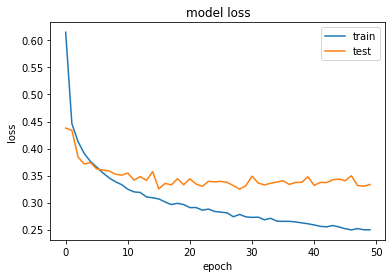

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

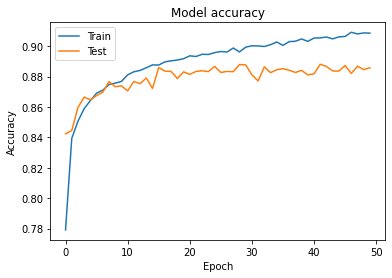

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Relu for each layer but the last.

Last Layer:
    - Sigmoid for single class
    - Softmax for multiclass

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [31]:
def create_model(n_nodes, drop, activation):  
    model = Sequential()
    model.add(Dense(n_nodes, activation=activation, input_shape=(19,)))
    model.add(Dropout(drop))
    model.add(Dense(n_nodes, activation=activation))
    model.add(Dropout(drop))
    model.add(Dense(n_nodes, activation=activation))
    model.add(Dropout(drop))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

In [ ]:
model = KerasRegressor(
    build_fn=create_model,
    batch_size=12,
    epochs=40,
    drop=0.1,
    activation='relu',
#     n_nodes=64,
#     n_layers=4,
)

param_distributions = {
#     'batch_size': range(2, 24, 2),
#     'epochs': range(20, 200, 20),
#     'drop': [0.1, 0.15, 0.2, 0.25, 0.3],
#     'activation': ['tanh', 'relu', 'linear', 'softmax', 'softplus', 'softsign', 'sigmoid', 'hard_sigmoid'],
    'n_nodes': range(32, 161, 32),
}

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    cv=3,
    n_iter=5,
    n_jobs=8,
    random_state=42,
)

search_result = search.fit(x_train, y_train)

print(f"Best: {search_result.best_score_} using {search_result.best_params_}")
means = search_result.cv_results_['mean_test_score']
stds = search_result.cv_results_['std_test_score']
params = search_result.cv_results_['params']